In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

__author__ = "Peter Nordin"
__license__ = "GPL"
__email__ = "peter.nordin@liu.se"

'''The purpose of this script is to allow easy calulation of the parasitic inductance and/or capacitance that
   will result from the choice of time step and material properties in Hopsan'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from TLMclasses import *

         k &         Ts &         Par. Ind &         Par. Cap &       Perc. Mass &  Perc. Stiffness &        Resonance
2.6389E+11 &      1E-12 &  2.638937829E-13 &                0 &  2.638937829E-13 &  2.638937829E+11 &            1E+12
2.6389E+11 &      1E-11 &  2.638937829E-11 &                0 &  2.638937829E-11 &  2.638937829E+11 &            1E+11
2.6389E+11 &      1E-10 &  2.638937829E-09 &                0 &  2.638937829E-09 &  2.638937829E+11 &            1E+10
2.6389E+11 &      1E-09 &  2.638937829E-07 &                0 &  2.638937829E-07 &  2.638937829E+11 &       1000000000
2.6389E+11 &      1E-08 &  2.638937829E-05 &                0 &  2.638937829E-05 &  2.638937829E+11 &        100000000
2.6389E+11 &      1E-07 &   0.002638937829 &                0 &   0.002638937829 &  2.638937829E+11 &         10000000
2.6389E+11 &    2.5E-07 &    0.01649336143 &                0 &    0.01649336143 &  2.638937829E+11 &          4000000
2.6389E+11 &      5E-07 &    0.06597344573 &    

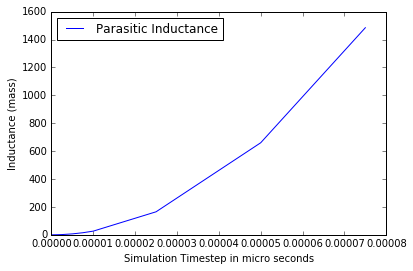

In [2]:
# For a single step Mechanical Spring TLM modelled as a pure capacitance (linear elastic spring), calculate parasitic inductance

# Spring
k=2.63893782902e+11
n=1

Tdesired = 1e-12

kvec = [1e6, 1e7, 1e8, 1e9, 1e10, 1e11, k]
kvec = [k]

for k in kvec:
    #Ts = [Tdesired/n, Tdesired/n*2, Tdesired/n*4, Tdesired/n*8, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1e-0]
    Ts = [Tdesired/n, Tdesired/n*10, Tdesired/n*100, Tdesired/n*1000, Tdesired/n*10000, 1e-7, 2.5e-7, 5e-7, 7.5e-7, 1e-6, 2.5e-6, 5e-6, 7.5e-6, 1e-5, 2.5e-5, 5e-5, 7.5e-5]
    Ts = sorted(Ts)

    templatehead = "{0:>10} & {1:>10} & {2:>16} & {3:>16} & {4:>16} & {5:>16} & {6:>16}"
    template = "{0:10.5G} & {1:10.10G} & {2:16.10G} & {3:16.10G} & {4:16.10G} & {5:16.10G} & {6:16.10G}"
    print(templatehead.format("k", "Ts", "Par. Ind", "Par. Cap", "Perc. Mass", "Perc. Stiffness", "Resonance"))
    paraind = list()
    for t in Ts:
        #zc_desired = K/volume*t
        tp = TLMMechanicSpring(k, t)
        #tp = TLMMechanicLine(E, rho, X, A, zctype='pureinductance')
        #tp = TLMMechanicLine(E, rho, X, A, zctype='normal')
        tp.calcStuff(t, n)

        print(template.format(k, t, tp.parasitic.ind, tp.parasitic.cap, tp.percived.ind, tp.percived.stiffness, np.sqrt(tp.percived.stiffness/tp.percived.ind)))
        template2 = "{0:>23.5G}  {1:>17.10G}"
        #print(template2.format(tp.percived.zc,tp.parasitic.ind2))
        paraind.append(tp.parasitic.ind)

fig, axL = plt.subplots()
#plt.title('Length and parasitic mass realtive to simualtion timestep')
axL.plot(Ts, paraind, label='Parasitic Inductance')
axL.set_ylabel('Inductance (mass)')
axL.set_xlabel('Simulation Timestep in micro seconds')
axL.legend(loc='best')
plt.show()

In [3]:
# A solid mechanic TLM element, with typical solid material properties
# If modelled as a pure capacitance (linear elastic spring) then we get parasitic inductance
# If modelled as a pure inductance (rigid mass) then we get parasitic capacitance (reduced stiffness, so its not really rigid anymore)
# If modelled as a pure impedance (normal way) then we get both pparasitic inductance and capacitance 

# Solid properties
E=2.1e11
rho=7850
X=0.4
D=0.070*1
A=np.pi*D*D/4
n=1

waveSpeed = np.sqrt(E/rho)
Tdesired = X/waveSpeed
massdesired = A*X*rho

#Ts = [Tdesired/n, Tdesired/n*2, Tdesired/n*4, Tdesired/n*8, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1e-0]
#Ts = [Tdesired/abs(n), 2e-6, 1e-5, 1e-4, 5e-4, 1e-3, 1e-2]
Ts = [Tdesired/n, Tdesired/n*10, Tdesired/n*100, Tdesired/n*1000, Tdesired/n*10000, 1e-10, 1e-9, 1e-8, 1e-7, 2.5e-7, 5e-7, 7.5e-7, 1e-6, 2.5e-6, 5e-6, 7.5e-6, 1e-5, 2.5e-5, 5e-5, 7.5e-5, 1e-4, 5e-4, 1e-3, 5e-3]
Ts = sorted(Ts)

print('Desired Mass: ', massdesired)
templatehead = "{0:>16} & {1:>16} & {2:>16} & {3:>16} & {4:>16} & {5:>16} & {6:>16}"
template = "{0:16.10G} & {1:16.10G} & {2:16.10G} & {3:16.10G} & {4:16.10G} & {5:16.10G} & {6:16.10G}"
print(templatehead.format("Ts", "Par. Ind", "Par. Cap", "Perc. Mass", "Perc. Stiffness", "Zc", "Resonance"))
for t in Ts:
    #zc_desired = K/volume*t
    tp = TLMMechanicLine(E, rho, X, A, zctype='purecapacitance')
    #tp = TLMMechanicLine(E, rho, X, A, zctype='pureinductance')
    #tp = TLMMechanicLine(E, rho, X, A, zctype='normal')
    tp.calcStuff(t, n)

    print(template.format(t, tp.parasitic.ind, tp.parasitic.cap, tp.percived.ind, tp.percived.stiffness, tp.percived.zc, np.sqrt(tp.percived.stiffness/tp.percived.ind)))
    template2 = "{0:>16.5G}  {1:>17.10G} {2:>18.10G} {3:>18.10G}"
    #print(template2.format(tp.percived.zc, tp.parasitic.ind2, tp.parasitic.cap2, tp.percived.ind2))

Desired Mass:  12.084136142033142
              Ts &         Par. Ind &         Par. Cap &       Perc. Mass &  Perc. Stiffness &               Zc &        Resonance
           1E-10 &     -12.08413614 &                0 &  2.020436775E-11 &       2020436775 &     0.2020436775 &            1E+10
           1E-09 &     -12.08413614 &  1.033975766E-25 &  2.020436775E-09 &       2020436775 &      2.020436775 &       1000000000
           1E-08 &     -12.08413594 &                0 &  2.020436775E-07 &       2020436775 &      20.20436775 &        100000000
           1E-07 &     -12.08411594 &                0 &  2.020436775E-05 &       2020436775 &      202.0436775 &         10000000
         2.5E-07 &     -12.08400986 &                0 &  0.0001262772985 &       2020436775 &      505.1091938 &          4000000
           5E-07 &     -12.08363103 &                0 &  0.0005051091938 &       2020436775 &      1010.218388 &          2000000
         7.5E-07 &     -12.08299965 &            

In [4]:
# Two-mass-spring system test
m1 = 1
m2 = 22
kGain = 1000000
k1 = 100*kGain
k2 = 10*kGain

Ts = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1.5e-4, 2e-4, 3e-5, 4e-4, 5e-4, 1e-3]
Ts = sorted(Ts)

template = "{0:20} & {1:20} & {2:20} & {3:20} & {4:20} \\\\"
print(template.format("Time step", "Par.Cap", "Par.Ind", "Percived Stiffness", "Percived Mass"))
for t in Ts:
    tp1 = TLMLineParameters(1e99, 1e-20, np.sqrt(m1/k1), m1, 1.0/k1, 'purecapacitance')
    tp1.calcStuff(t,1)
    tp2 = TLMLineParameters(1e99, 1e-20, np.sqrt(m2/k2), m2, 1.0/k2, 'purecapacitance')
    tp2.calcStuff(t,1)
    
    print(template.format(str(t)+'  1:', str(tp1.parasitic.cap), str(tp1.parasitic.ind), str(tp1.percived.stiffness), str(tp1.percived.ind)))
    print(template.format(str(t)+'  2:', str(tp2.parasitic.cap), str(tp2.parasitic.ind), str(tp2.percived.stiffness), str(tp2.percived.ind)))


Time step            & Par.Cap              & Par.Ind              & Percived Stiffness   & Percived Mass        \\
1e-09  1:            & 0.0                  & -0.9999999999        & 100000000.0          & 1.0000000000000002e-10 \\
1e-09  2:            & 1.3234889800848443e-23 & -21.99999999999      & 10000000.0           & 1.0000000000000001e-11 \\
1e-08  1:            & 0.0                  & -0.99999999          & 100000000.0          & 1e-08                \\
1e-08  2:            & 0.0                  & -21.999999999        & 10000000.0           & 1e-09                \\
1e-07  1:            & 0.0                  & -0.999999            & 100000000.0          & 1e-06                \\
1e-07  2:            & 0.0                  & -21.9999999          & 10000000.0           & 1e-07                \\
1e-06  1:            & 0.0                  & -0.9999              & 100000000.0          & 9.999999999999999e-05 \\
1e-06  2:            & 0.0                  & -21.99999          